# Downloading weights

In [2]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

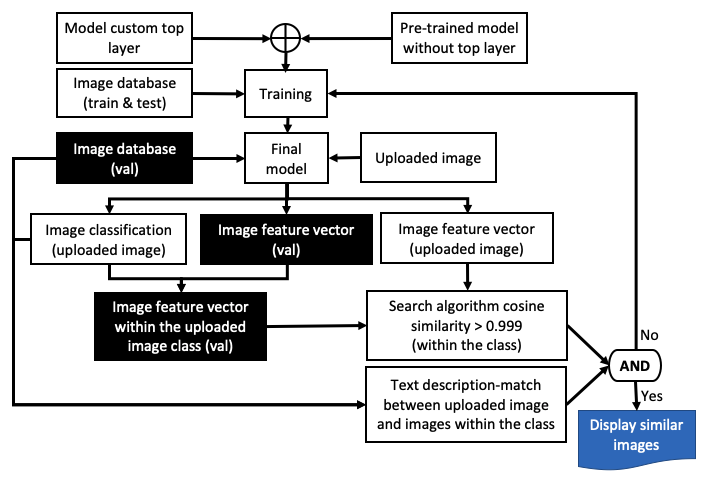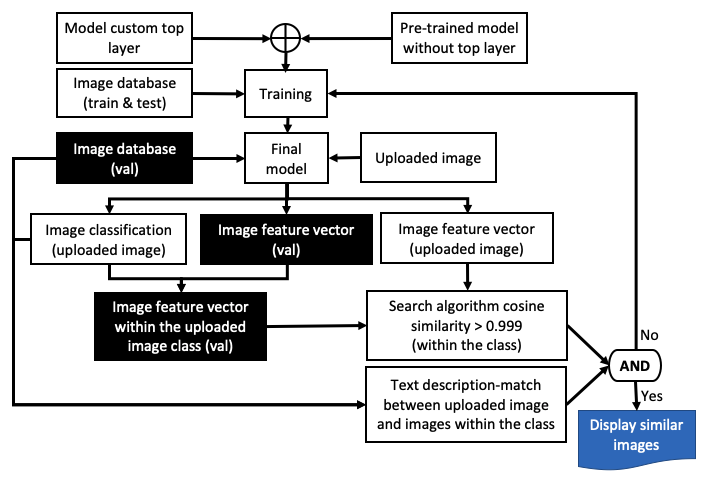

##### It does the preprocessing of the image to normalize the current image to the ImageNet RGB dataset. Since the model is developed on the ImageNet dataset, without this step, the model will likely result in the wrong prediction of classes.

# Decoding predictions
The ImageNet data has 1,000 different classes. A neural network such as Inception trained on ImageNet will output the class as an integer. We need to convert the integer to a corresponding class name using decoding. For example, if the integer value output is 311, we need to decode what 311 means. With decoding, we will know that 311 corresponds to a folding chair.

In [4]:
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.inception_v3 import decode_predictions

# Importing other common features
This section is about importing Keras and Python's common package. **Keras preprocessing is the image processing module of Keras.** The code for other common import functions is shown here:

In [5]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

# Constructing a model
In this section, we will import a model. The code for model construction is shown as follows (the explanation of each code snippet is just underneath the code):

In [6]:
img_width, img_height = 299, 299

In [7]:
model_pretrained = InceptionV3(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

In [8]:
img_path = '../notebooks/stainless_laddle.jpg'

40960/35363 [==================================] - 0s 1us/step


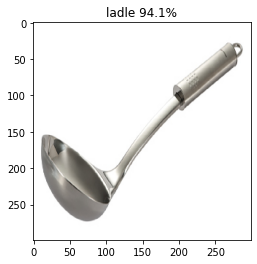

In [9]:
# Insert correct path of your image below
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

cnn_feature = model_pretrained.predict(img_data,verbose=0)
label = decode_predictions(cnn_feature)
label = label[0][0]


plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
#plt.title(label[1] + str(""%.1f" label[2]*100))
plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()

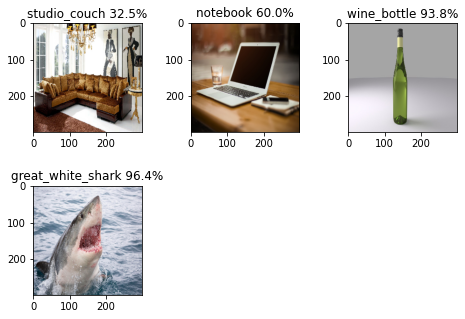

In [10]:
# Insert correct path of your image folder below

folder_path = '../notebooks/test_images/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(8,8))
i=0
rows=3
columns=3

for image1 in images:
    i+=1
    im = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(im)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]
    
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(im)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()